In [1]:
from keras.models import load_model
model = load_model('cats_and_dogs_small.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 128)     

In [2]:
img_path = r'C:\Users\natsc\Desktop\machine_learning\deeplearningwithpython\cats-and-dogs-dataset-small\test\cats/cat.1700.jpg'
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img(img_path,target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


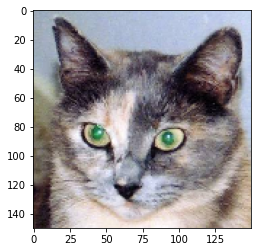

In [3]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [4]:
img_tensor.ndim

4

In [5]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input,outputs=layer_outputs)


In [6]:
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

1/1 [==============================] - 0s 95ms/step
(1, 148, 148, 32)


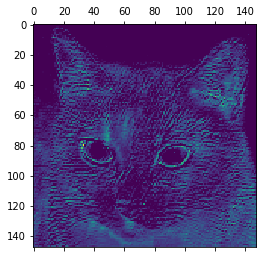

In [7]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0,:,:,4], cmap='viridis')

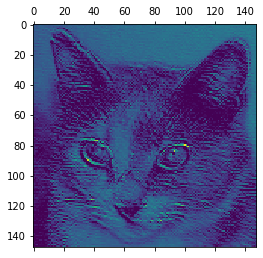

In [8]:
plt.matshow(first_layer_activation[0,:,:,7], cmap='viridis')

(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(148, 148)
(296, 2368)
(74, 74)
(148, 1184)
(74, 74)
(148, 1184)
(74, 74)
(148, 1184)
(74, 74)
(148, 1184)
(74, 74)
(148, 1184)
(74, 74)
(148, 1184)
(74, 74)
(148, 1184)
(74, 74)
(148, 1184)
(74, 74)
(148, 1184)
(74, 74)
(148, 1184)
(74, 74)
(148, 1184)
(74, 74)
(148, 1184)
(74, 74)
(14

C:\Users\natsc\AppData\Local\Temp\ipykernel_18200\2643039076.py:21: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


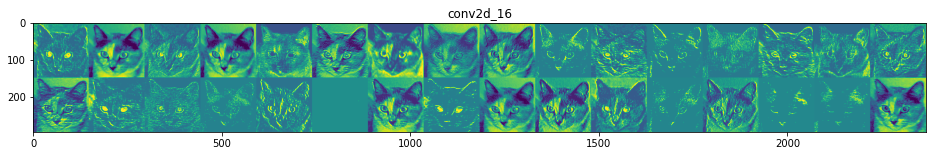

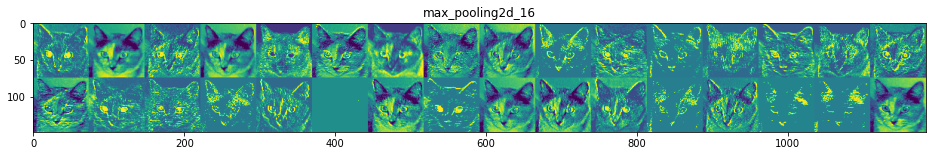

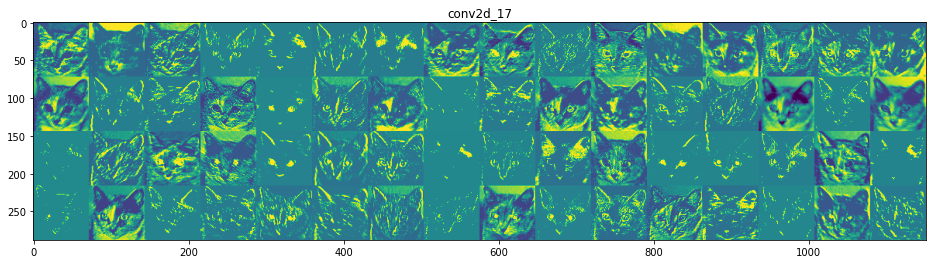

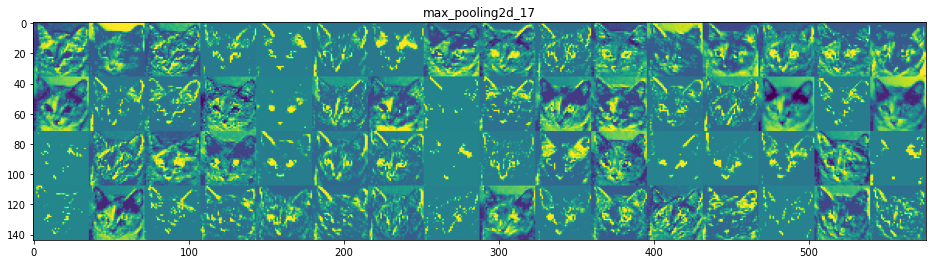

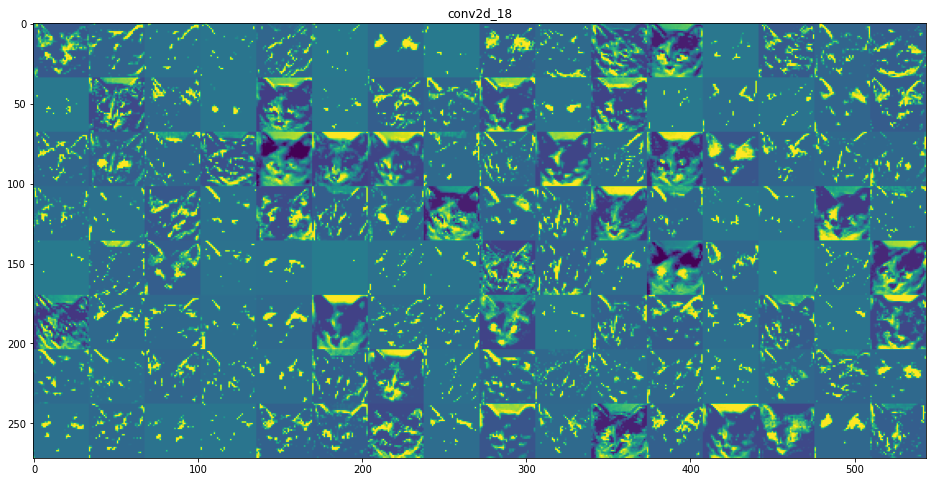

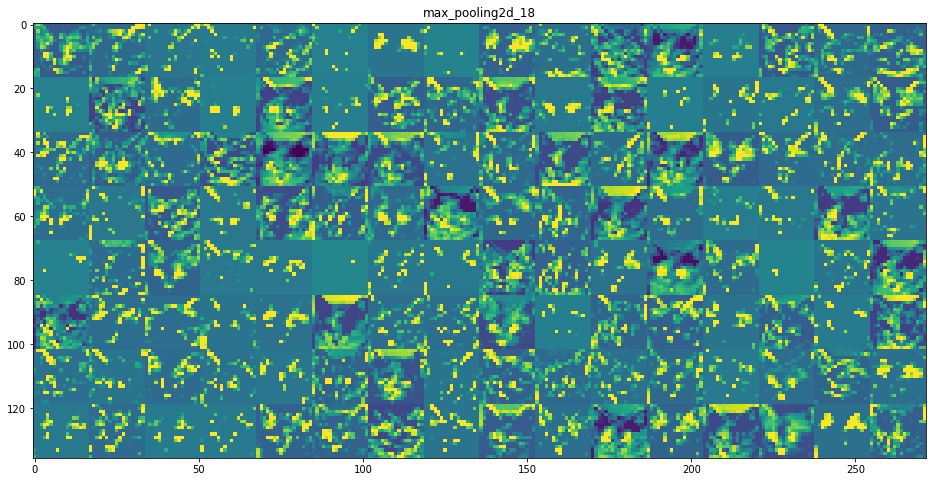

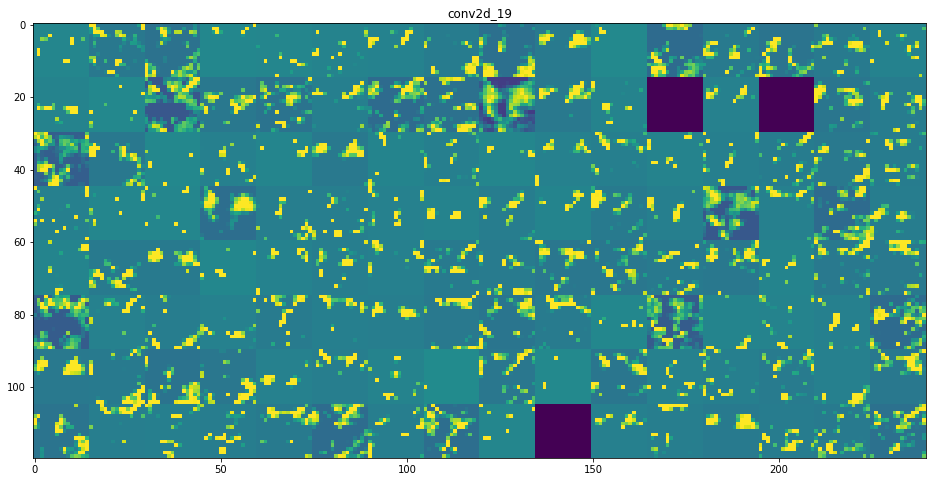

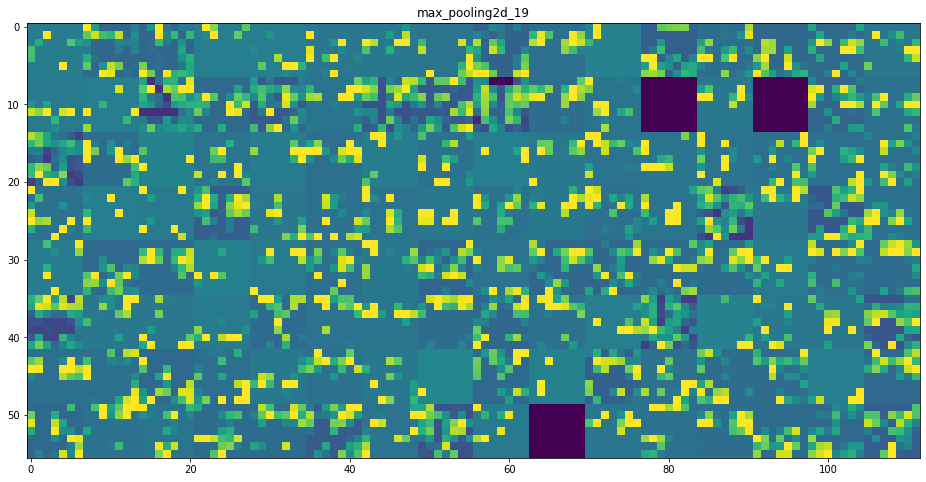

In [9]:



layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names,activations):
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
            :,:,
            col*images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image,0,255).astype('uint8')
            print(channel_image.shape)
            print(display_grid.shape)
            display_grid[col*size : (col + 1) * size,row*size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                scale * display_grid.shape[0]))

    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap = 'viridis')


#VISUALIZING CONVNET FILTERS

In [14]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',include_top=False)

layer_name = "block3_conv1"

filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:,:,:,filter_index])



In [18]:
grads = K.gradients(loss, model.input)[0]

TypeError: 'GradientTape' object is not subscriptable

In [16]:
import tensorflow as tf